# Section 2 - Implementing Markowitz



* In the presence of a rik-free asset the efficient becomes a straigt line...
* The capital market line!
* All investors should hold a combination of the risk-free asset and the portfolio that maximzes th reward-per-risk ratio.

## Labor Session - Finding the Max Sharpe Ration Portfolio!

We've already seen that given a set of expected returns and covariance matrix, we can plot the efficient frontier. In this lab, we'll extend the code to locate the point on the efficient frontier that we are most interested in, which is the *Tangency* portfolio or the *Max Sharpe Ratio* portfolio.

Let's start by the usual imports, and load in the data:

In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996": "2000"], 12)
cov = ind["1996":"2000"].cov()

In [8]:
ind.sample(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2015-03,-0.0072,-0.0207,-0.0847,-0.0260,0.0056,-0.0198,0.0123,0.0084,-0.0356,0.0333,...,-0.0220,-0.0151,-0.0307,-0.0173,-0.0362,0.0054,0.0101,-0.0029,0.0011,-0.0173
2010-03,0.0444,0.0611,0.0612,0.1206,0.0553,0.0213,0.1139,0.0361,0.0736,0.0842,...,0.0788,0.0522,0.0812,0.0586,0.0811,0.0599,0.0614,0.0827,0.0814,0.0907
1962-08,0.0004,0.0445,0.0165,0.0595,0.0423,0.0136,0.0316,-0.0792,0.0446,-0.0072,...,0.0158,0.0118,0.0303,0.0290,0.0337,0.0433,0.0443,0.0074,0.0380,0.0581


In [9]:
er.sample(3)

Trans    0.071099
Steel    0.115809
Meals    0.067400
dtype: float64

In [12]:
cov.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741


We already know how to identify points on the curve if we are given a target rate of return. Instead of minimizing the vol based on a target return, we want to find that one point on the curve that maximized the Harpe Ration, given the risk free rate. This is implemented in the function `.msr(riskfree_rate, er, cov)` in the helper module `edhec_risk_kit.py`.

So let's guess where the point might be:

(0.0, 0.14178366250989724)

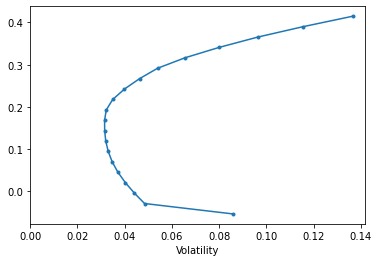

In [21]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)

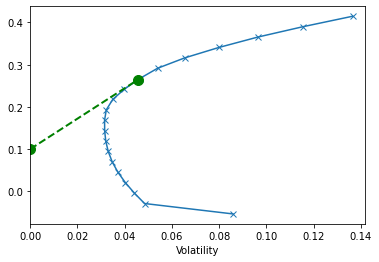

In [23]:
# Let's plot the multi-asset efficient frontier
# Or the Max Sharpe Ratio Portfolio
erk.plot_ef(20, er, cov, style='x-', show_cml=True, riskfree_rate=0.1);